In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
print(df_train.shape)
print(df_test.shape)

(59381, 128)
(19765, 127)


In [5]:
df_train.sample(3)

Id  Product_Info_1    ...    Medical_Keyword_48  Response
1857    2488               1    ...                     0         8
2454    3265               1    ...                     0         6
36070  47899               2    ...                     1         6

[3 rows x 128 columns]

The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32



In [6]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
df_train.select_dtypes(include='O').columns

Index(['Product_Info_2'], dtype='object')

In [8]:
df_train.select_dtypes(include='float64').columns

Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [9]:
df_train.select_dtypes(include='int64').columns

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=109)

<h2>Data Preprocessing</h2>

The first thing is to check if there is any missing value in the dataset. I used python to extract the columns which contains the missing value as well as the percentage of missing value.

In [10]:
#proportion of null values per columns
print('proportion of null values in train set : ')
print(df_train.isnull().sum(axis = 0).sort_values(ascending = False).head(10)/len(df_train))
print('\n')
print('proportion of null values in test set : ')
print(df_test.isnull().sum(axis = 0).sort_values(ascending = False).head(10)/len(df_test))

proportion of null values in train set : 
Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
Family_Hist_4          0.323066
Employment_Info_6      0.182786
dtype: float64


proportion of null values in test set : 
Medical_History_10     0.989831
Medical_History_32     0.982241
Medical_History_24     0.940299
Medical_History_15     0.752036
Family_Hist_5          0.689299
Family_Hist_3          0.559777
Family_Hist_2          0.499874
Insurance_History_5    0.410068
Family_Hist_4          0.337819
Employment_Info_6      0.191601
dtype: float64


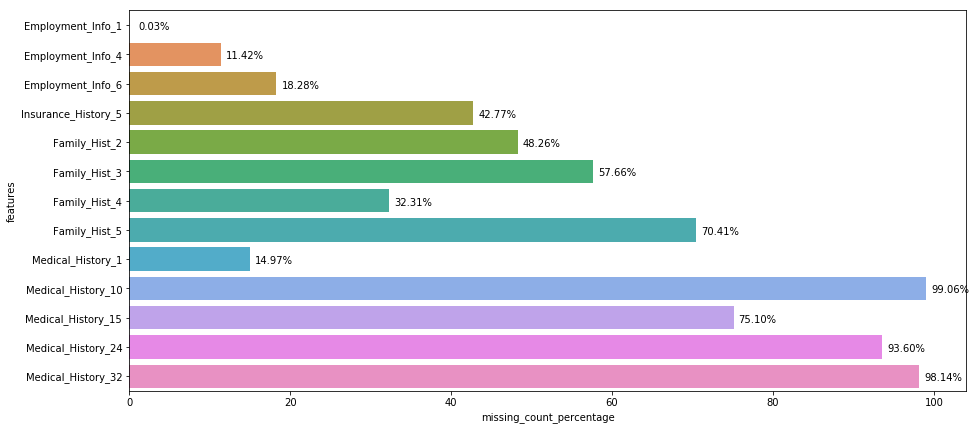

In [11]:
#Exploring missing values
train_missing= df_train.isnull().sum()[df_train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/len(df_train))*100
plt.figure(figsize=(15,7))
#train_missing
splot = sns.barplot(y=train_missing['features'],x=train_missing['missing_count_percentage'])
for p in splot.patches:
    splot.annotate(str(format(p.get_width(), '.2f')+'%'), (p.get_width()+3,p.get_y() + p.get_height() ), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [12]:
df_train.head(3)

Id  Product_Info_1    ...    Medical_Keyword_48  Response
0   2               1    ...                     0         8
1   5               1    ...                     0         4
2   6               1    ...                     0         8

[3 rows x 128 columns]

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Product_Info_2']=le.fit_transform(df_train['Product_Info_2'])
df_test['Product_Info_2']=le.transform(df_test['Product_Info_2'])

In [14]:
df_train.describe()

Id      ...           Response
count  59381.000000      ...       59381.000000
mean   39507.211515      ...           5.636837
std    22815.883089      ...           2.456833
min        2.000000      ...           1.000000
25%    19780.000000      ...           4.000000
50%    39487.000000      ...           6.000000
75%    59211.000000      ...           8.000000
max    79146.000000      ...           8.000000

[8 rows x 128 columns]

In [15]:
# Features
target = "Response"
features = df_train.columns.tolist()

if "Id" in features:
    features.remove("Id")
    
if "Response" in features:
    features.remove("Response")

In [16]:
spearman = df_train[features + [target]].corr("spearman")
kendall = df_train[features + [target]].corr("kendall")
pearson = df_train[features + [target]].corr("pearson")

In [17]:
p = pearson[target].rename("Pearson")
k = kendall[target].rename("Kendall")
s = spearman[target].rename("Spearman")



corr = pd.DataFrame(data = p)
corr = corr.assign(Spearman = s)
corr = corr.assign(Kendall = k)

from IPython.display import display

display(corr.round(2).sort_values("Pearson", ascending=False))

Pearson  Spearman  Kendall
Response                1.00      1.00     1.00
Medical_History_23      0.29      0.31     0.28
Medical_History_15      0.28      0.31     0.25
Medical_History_4       0.24      0.28     0.25
Medical_History_39      0.22      0.21     0.18
Product_Info_4          0.20      0.25     0.19
Medical_History_6       0.16      0.16     0.14
Medical_History_32      0.14      0.08     0.07
Medical_History_40      0.13      0.12     0.11
Medical_History_13      0.13      0.12     0.11
InsuredInfo_6           0.13      0.16     0.14
Medical_History_33      0.11      0.12     0.11
Medical_History_1       0.10      0.16     0.12
InsuredInfo_1           0.08      0.10     0.09
Medical_History_29      0.08      0.08     0.07
Medical_History_20      0.08      0.07     0.06
Medical_History_27      0.08      0.08     0.07
Employment_Info_2       0.08      0.05     0.04
Medical_History_9       0.07      0.07     0.06
Medical_History_17      0.07      0.07     0.06
Family_Hist_1           0.07      0.08     0.07
Employment_Info_5       0.05      0.07     0.06
Medical_History_31      0.05      0.04     0.04
Medical_History_22      0.05      0.04     0.04
Medical_History_34      0.04      0.05     0.04
Medical_History_11      0.04      0.04     0.04
Employment_Info_1       0.04      0.06     0.04
Medical_History_7       0.03      0.02     0.02
Medical_History_14      0.03      0.03     0.03
Medical_History_10      0.03      0.07     0.06
...                      ...       ...      ...
Medical_History_38     -0.06     -0.06    -0.05
Medical_Keyword_47     -0.06     -0.06    -0.05
Medical_Keyword_24     -0.07     -0.08    -0.07
Product_Info_3         -0.07     -0.08    -0.07
Medical_History_5      -0.07     -0.06    -0.06
Medical_History_12     -0.07     -0.06    -0.06
Medical_Keyword_37     -0.08     -0.07    -0.07
Medical_Keyword_40     -0.08     -0.07    -0.06
InsuredInfo_2          -0.08     -0.08    -0.07
Medical_Keyword_38     -0.09     -0.09    -0.08
Medical_Keyword_42     -0.09     -0.09    -0.08
Family_Hist_4          -0.09     -0.10    -0.07
Medical_History_18     -0.09     -0.08    -0.07
InsuredInfo_7          -0.09     -0.09    -0.08
Medical_Keyword_1      -0.09     -0.09    -0.08
Ht                     -0.09     -0.12    -0.09
Medical_History_28     -0.09     -0.08    -0.07
Medical_Keyword_25     -0.10     -0.12    -0.10
InsuredInfo_5          -0.10     -0.09    -0.08
Medical_Keyword_23     -0.11     -0.12    -0.11
Medical_History_30     -0.11     -0.12    -0.10
Employment_Info_3      -0.12     -0.10    -0.09
Insurance_History_2    -0.12     -0.11    -0.10
Medical_History_16     -0.14     -0.14    -0.13
Medical_Keyword_48     -0.16     -0.16    -0.14
Ins_Age                -0.21     -0.22    -0.16
Medical_Keyword_3      -0.26     -0.24    -0.21
Medical_Keyword_15     -0.26     -0.29    -0.26
Wt                     -0.35     -0.40    -0.30
BMI                    -0.38     -0.43    -0.32

[127 rows x 3 columns]